<a href="https://colab.research.google.com/github/estefanabermeo/ValoresAtipicos/blob/main/A3_1_A01367558.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3.1 (Valores Atípicos)**
#### Estefana Bermeo Severiano
#### A01367558

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('ventastotales_sin_nulos.csv')
df.head(5)
     

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [3]:
nulos=df.isnull().sum()
nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

### **ventas_precios_corrientes**

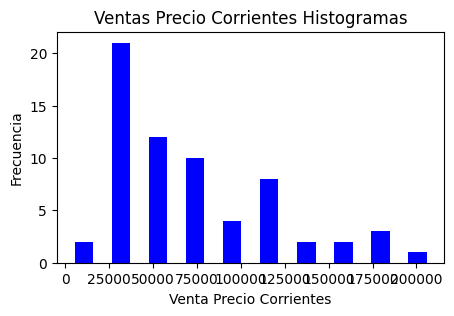

In [4]:
# Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_precios_corrientes"], color='blue', rwidth=0.50)
plt.title('Ventas Precio Corrientes Histogramas')
plt.xlabel('Venta Precio Corrientes')
plt.ylabel('Frecuencia')
plt.show()

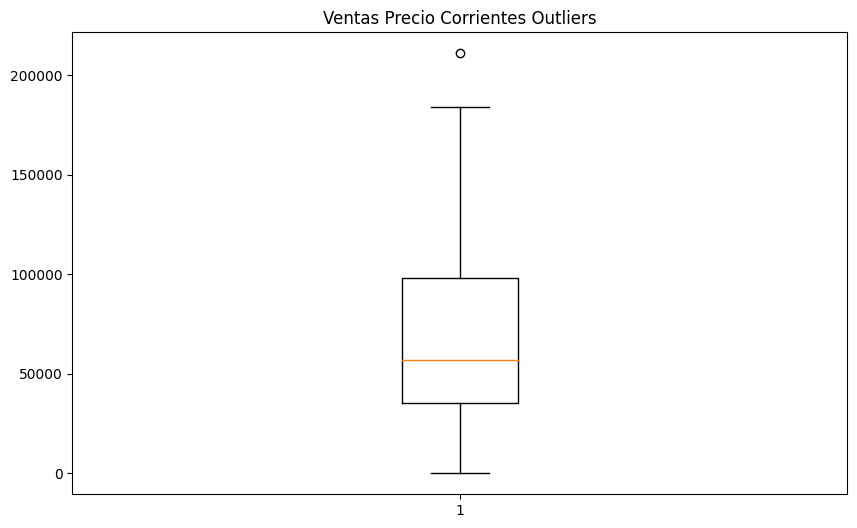

In [5]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_precios_corrientes"]) 
plt.title("Ventas Precio Corrientes Outliers")
plt.show()

In [6]:
# Método: Desviación estándar
y=df["ventas_precios_corrientes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 214312.62398613384
Limite inferior permitido -69832.22706305691


In [7]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [8]:
#Método: Cuartiles 0.25 y 0.75
y=df["ventas_precios_corrientes"]
percentile25=y.quantile(0.25) # Cuartil 1
percentile75=y.quantile(0.75) # Cuartil 2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 192319.35000000003
Limite inferior permitido -59178.650000000016


In [9]:
#Outliers
outliersa= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersa

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,81140696.22,76413721.76,4726974.457,81140696.22,24935747.29,22143208.63,...,23393038.41,2630487.791,9592798.115,8463266.123,2712593.828,518942.5376,11217153.19,2502616.619,6125265.839,5935993.913


In [10]:
#Datos limpios
data_cleana= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleana

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


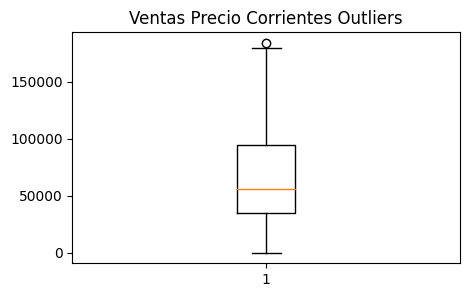

In [11]:
#Diagrama de caja / bigote
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleana["ventas_precios_corrientes"]) 
plt.title("Ventas Precio Corrientes Outliers")
plt.show() 

In [12]:
data_cleana.to_csv("ventas_precio_corrientes.csv")
from google.colab import files
files.download("ventas_precio_corrientes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **ventas_precios_constantes**

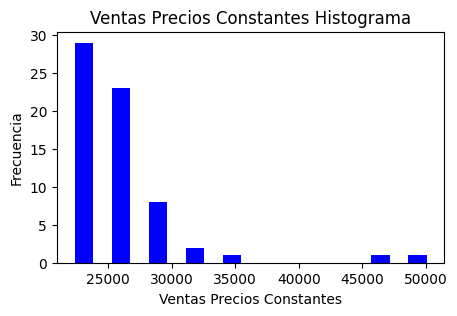

In [13]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_precios_constantes"], color='blue', rwidth=0.50)
plt.title('Ventas Precios Constantes Histograma')
plt.xlabel('Ventas Precios Constantes')
plt.ylabel('Frecuencia')
plt.show()

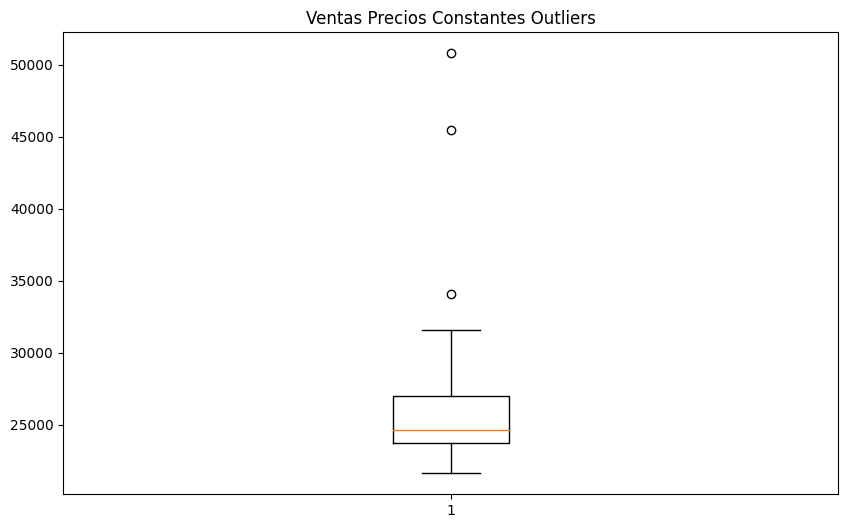

In [14]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_precios_constantes"]) 
plt.title("Ventas Precios Constantes Outliers")
plt.show()

In [15]:
#Método: Desviación estándar
y=df["ventas_precios_constantes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 40022.90598479884
Limite inferior permitido 12104.484784431932


In [16]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,46962602.22,46053650.13,...,37505172.62,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07


In [17]:
#Método: Cuartiles 0.25 y 0.75
y=df["ventas_precios_constantes"]
percentile25=y.quantile(0.25) # Cuartil 1
percentile75=y.quantile(0.75) # Cuartil 2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 31938.75
Limite inferior permitido 18759.949999999997


In [18]:
#Outliers
outliersb= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersb

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,11070098.74,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,22143208.63,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,46053650.13,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


In [19]:
#Datos limpios
data_cleanb= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_cleanb

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


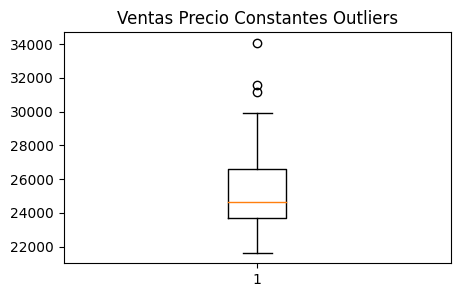

In [20]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanb["ventas_precios_constantes"]) 
plt.title("Ventas Precio Constantes Outliers")
plt.show()

In [21]:
data_cleanb.to_csv("ventas_precio_constantes.csv")
from google.colab import files
files.download("ventas_precio_constantes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **ventas_totales_canal_venta**

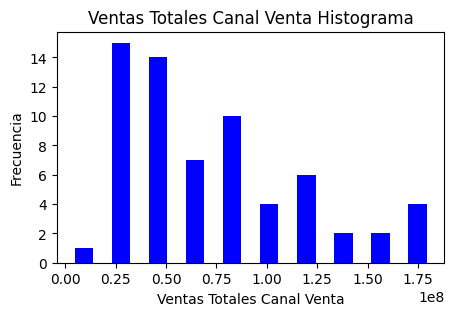

In [22]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_totales_canal_venta"], color='blue', rwidth=0.50)
plt.title('Ventas Totales Canal Venta Histograma')
plt.xlabel('Ventas Totales Canal Venta')
plt.ylabel('Frecuencia')
plt.show()

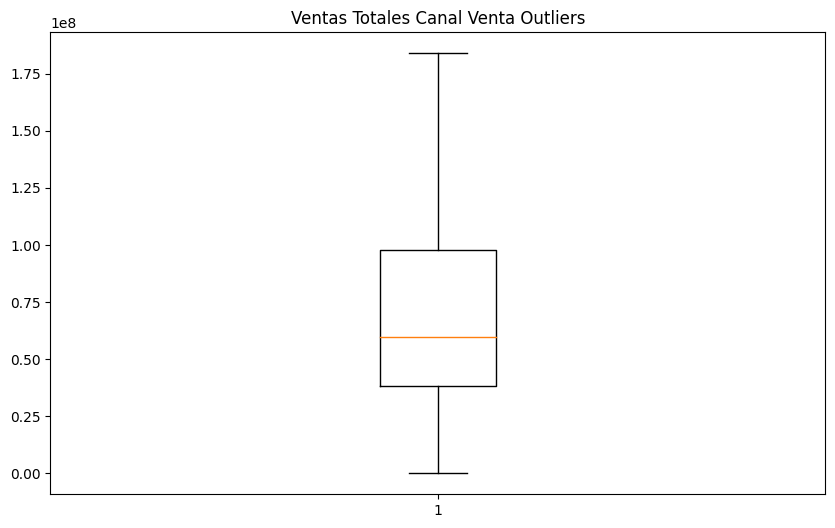

In [23]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_totales_canal_venta"]) 
plt.title("Ventas Totales Canal Venta Outliers")
plt.show() 

In [24]:
#Método: Desviación estándar
y=df["ventas_totales_canal_venta"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 207440738.1500299
Limite inferior permitido -59963939.482473865


In [25]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [26]:
#Método: Cuartiles 0.25 y 0.75
y=df["ventas_totales_canal_venta"]
percentile25=y.quantile(0.25) # Cuartil 1
percentile75=y.quantile(0.75) # Cuartil 2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 187511643.5
Limite inferior permitido -51165850.5


In [27]:
#Outliers
outliersc= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersc

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [28]:
#Datos limpios
data_cleanc= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_cleanc

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


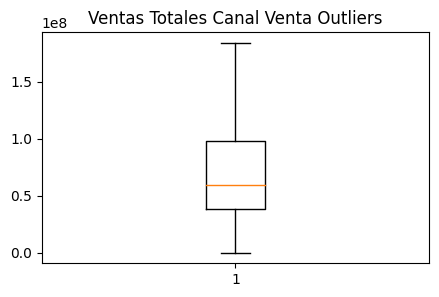

In [29]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanc["ventas_totales_canal_venta"]) 
plt.title("Ventas Totales Canal Venta Outliers")
plt.show()

In [30]:
data_cleanc.to_csv("ventas_totales_canal_venta.csv")
from google.colab import files
files.download("ventas_totales_canal_venta.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **salon_ventas**

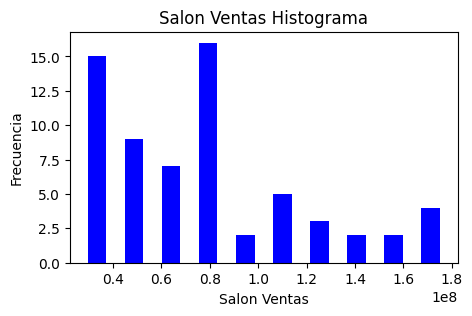

In [31]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["salon_ventas"], color='blue', rwidth=0.50)
plt.title('Salon Ventas Histograma')
plt.xlabel('Salon Ventas')
plt.ylabel('Frecuencia')
plt.show()

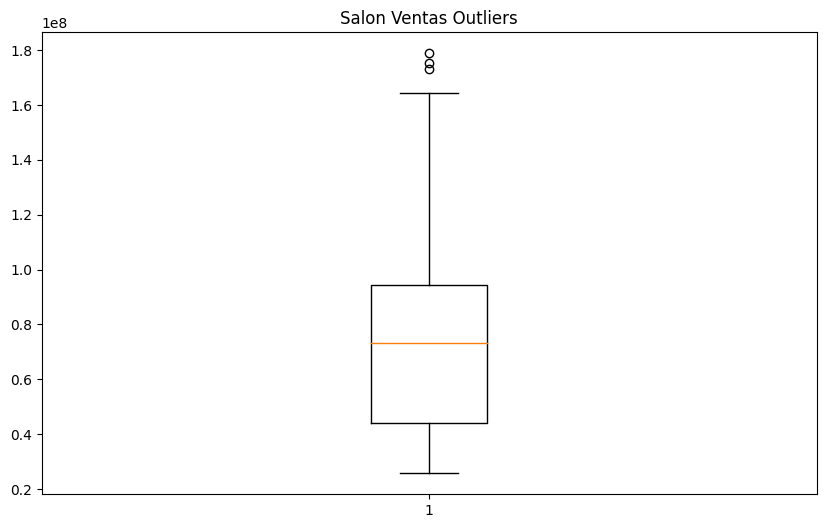

In [32]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["salon_ventas"]) 
plt.title("Salon Ventas Outliers")
plt.show()

In [33]:
#Método: Desviación estándar
y=df["salon_ventas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 197606560.2425
Limite inferior permitido -45934387.42188464


In [34]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [35]:
#Método: Cuartiles 0.25 y 0.75
y=df["salon_ventas"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 170440082.58499998
Limite inferior permitido -32001350.254999995


In [36]:
#Outliers
outliersd= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersd

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,4647828.60,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [37]:
#Datos limpios
data_cleand= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleand

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07


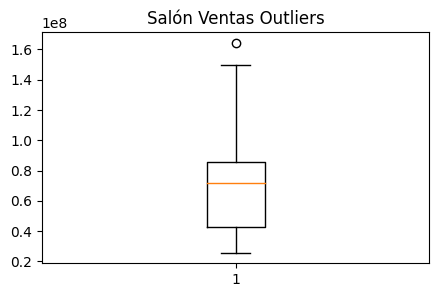

In [38]:
#Diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleand["salon_ventas"]) 
plt.title("Salón Ventas Outliers")
plt.show()

In [39]:
data_cleand.to_csv("salon_ventas.csv")
from google.colab import files
files.download("salon_ventas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **canales_on_line**

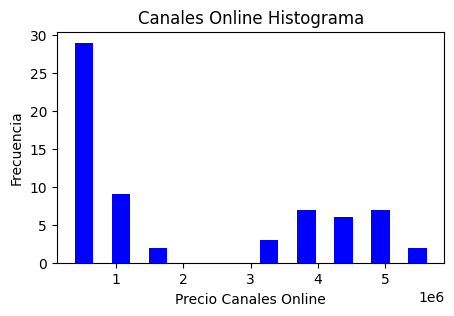

In [40]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["canales_on_line"], color='blue', rwidth=0.50)
plt.title('Canales Online Histograma')
plt.xlabel('Precio Canales Online')
plt.ylabel('Frecuencia')
plt.show() 

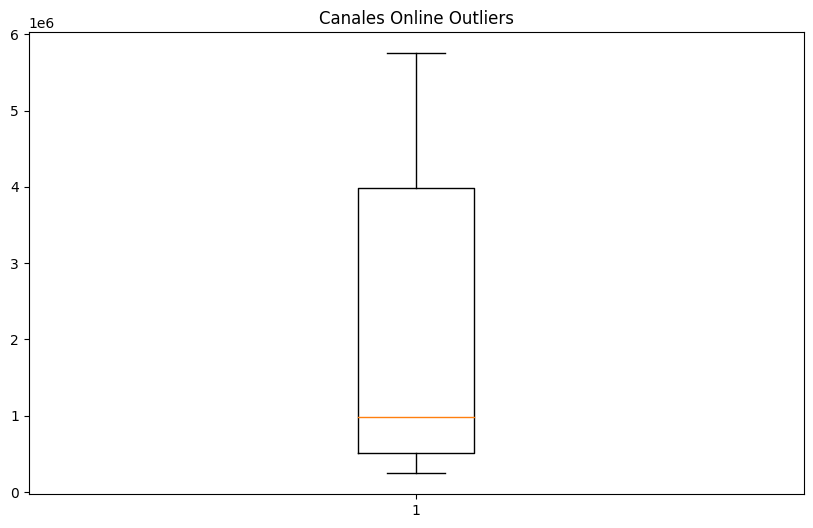

In [41]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["canales_on_line"]) 
plt.title("Canales Online Outliers")
plt.show()

In [42]:
#Método: Desviación estándar
y=df["canales_on_line"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 7623053.091870596
Limite inferior permitido -3467249.0753690572


In [43]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [44]:
#Método: Cuartile (0.25 y 0.75)
y=df["canales_on_line"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 9196780.92675
Limite inferior permitido -4707517.02725


In [45]:
#Outliers
outlierse= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outlierse

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [46]:
#Datos limpios
data_cleane= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleane

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


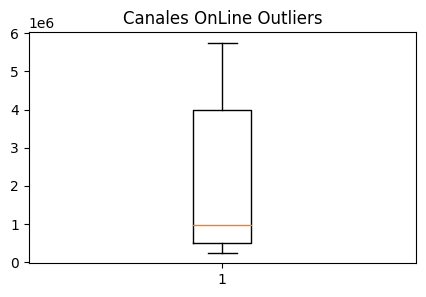

In [47]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanc["canales_on_line"]) 
plt.title("Canales OnLine Outliers")
plt.show()

In [48]:
data_cleane.to_csv("canales_on_line.csv")
from google.colab import files
files.download("canales_on_line.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **ventas_totales_medio_pago**

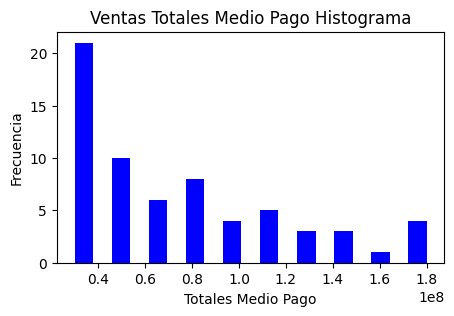

In [49]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_totales_medio_pago"], color='blue', rwidth=0.50)
plt.title('Ventas Totales Medio Pago Histograma')
plt.xlabel('Totales Medio Pago')
plt.ylabel('Frecuencia')
plt.show()

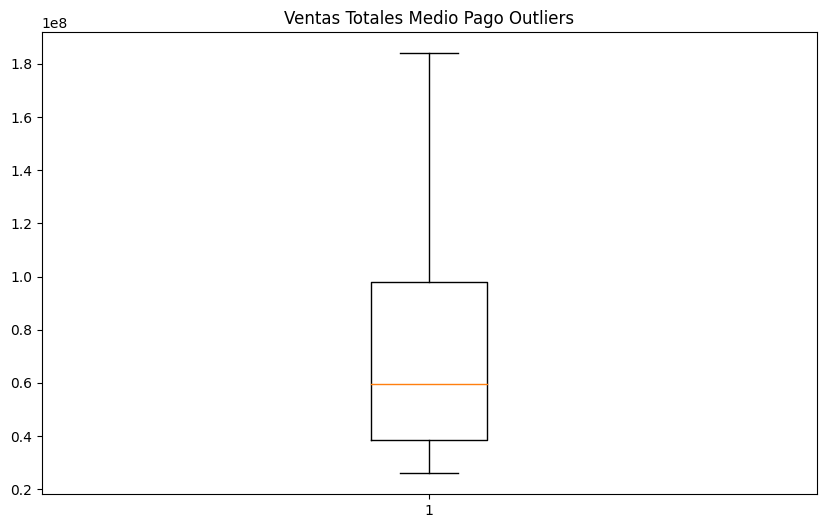

In [50]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_totales_medio_pago"]) 
plt.title("Ventas Totales Medio Pago Outliers")
plt.show()

In [51]:
#Método: Desviación estándar
y=df["ventas_totales_medio_pago"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 205953106.93160364
Limite inferior permitido -57477046.72544977


In [52]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [53]:
#Método: Cuartiles (0.25 y 0.75)
y=df["ventas_totales_medio_pago"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 187511643.5
Limite inferior permitido -51165850.5


In [54]:
#Outliers
outliersf= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersf

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [55]:
#Datos limpios
data_cleanf= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanf

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


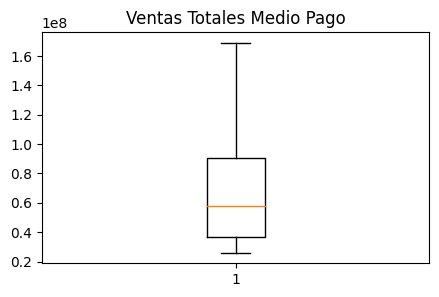

In [56]:
#Diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleand["ventas_totales_medio_pago"]) 
plt.title("Ventas Totales Medio Pago")
plt.show()

In [57]:
data_cleanf.to_csv("ventas_totales_medio_pago.csv")
from google.colab import files
files.download("ventas_totales_medio_pago.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **efectivo**

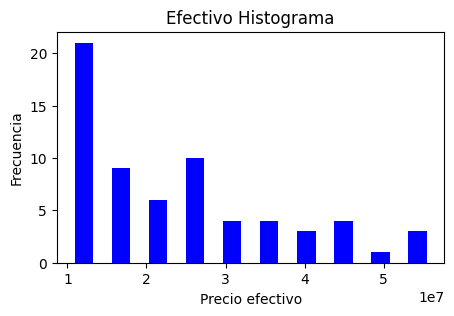

In [58]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["efectivo"], color='blue', rwidth=0.50)
plt.title('Efectivo Histograma')
plt.xlabel('Precio efectivo')
plt.ylabel('Frecuencia')
plt.show() 

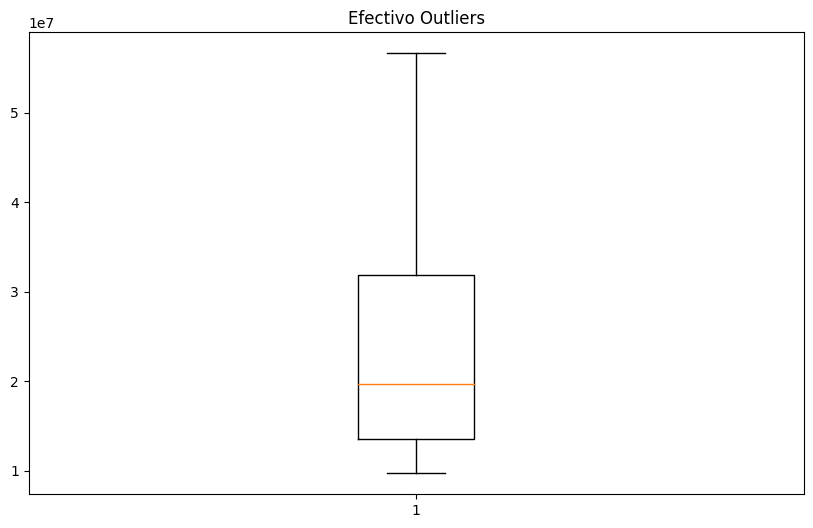

In [59]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["efectivo"]) 
plt.title("Efectivo Outliers")
plt.show() 

In [60]:
#Método: Desviación estándar
y=df["efectivo"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 61911595.63423146
Limite inferior permitido -14342695.590508386


In [61]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [62]:
#Método: Cuartile (0.25 y 0.75)
y=df["efectivo"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 59420215.78999999
Limite inferior permitido -14024584.689999996


In [63]:
#Outliers
outliersg= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersg

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [64]:
#Datos limpios
data_cleang= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleang

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


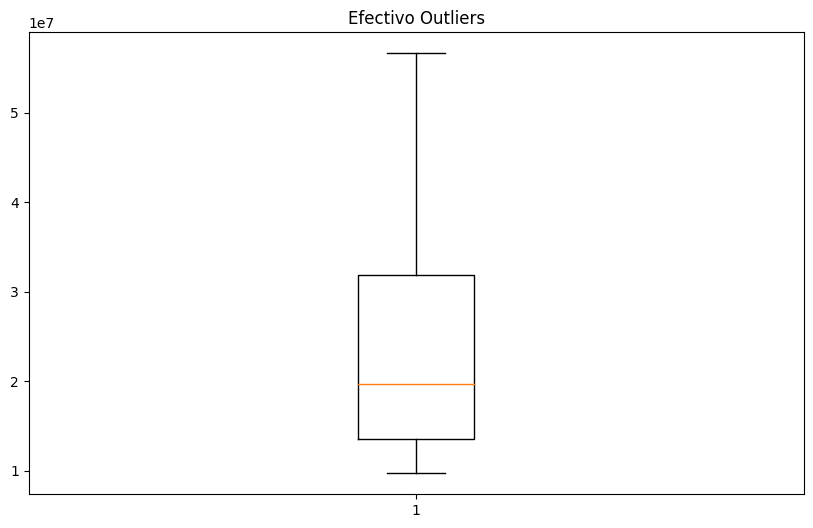

In [65]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data_cleanc["efectivo"]) 
plt.title("Efectivo Outliers")
plt.show()

In [66]:
data_cleang.to_csv("efectivo.csv")
from google.colab import files
files.download("efectivo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **tarjetas_debito**

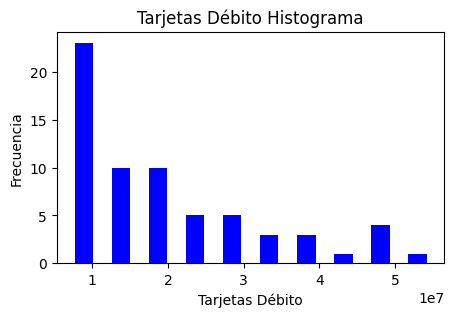

In [67]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["tarjetas_debito"], color='blue', rwidth=0.50)
plt.title('Tarjetas Débito Histograma')
plt.xlabel('Tarjetas Débito')
plt.ylabel('Frecuencia')
plt.show() 

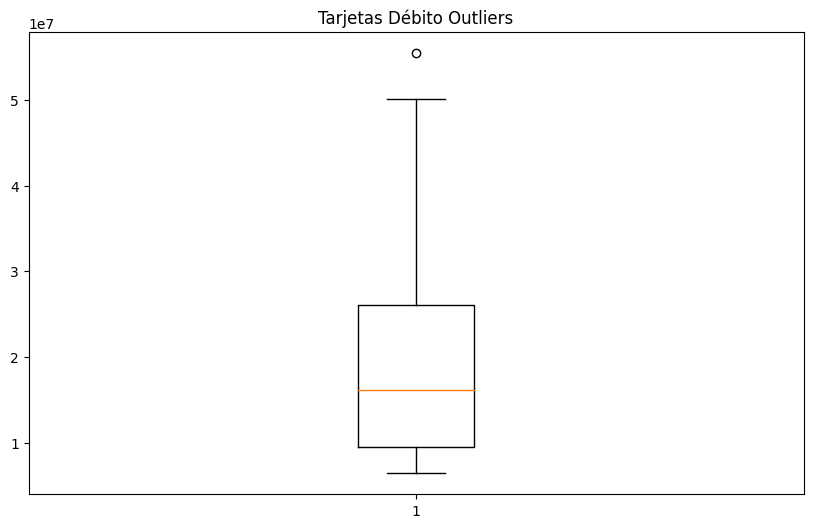

In [68]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["tarjetas_debito"]) 
plt.title("Tarjetas Débito Outliers")
plt.show() 

In [69]:
#Método: Desviación estándar
y=df["tarjetas_debito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 58179494.9472643
Limite inferior permitido -18390283.63738738


In [70]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [71]:
#Método: Cuartiles (0.25 y 0.75)
y=df["tarjetas_debito"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 50952216.5835
Limite inferior permitido -15349161.052499998


In [72]:
#Outliers
outliersh= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersh

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [73]:
#Datos limpios
data_cleanh= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanh

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


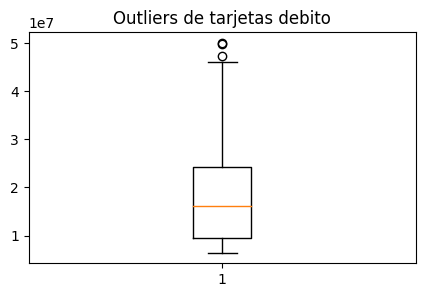

In [74]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanh["tarjetas_debito"]) 
plt.title("Outliers de tarjetas debito")
plt.show() 

In [75]:
data_cleanh.to_csv("tarejtas_debito.csv")
from google.colab import files
files.download("tarejtas_debito.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **tarjetas_credito**

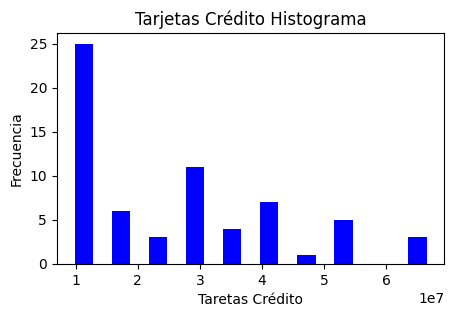

In [76]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["tarjetas_credito"], color='blue', rwidth=0.50)
plt.title('Tarjetas Crédito Histograma')
plt.xlabel('Taretas Crédito')
plt.ylabel('Frecuencia')
plt.show()

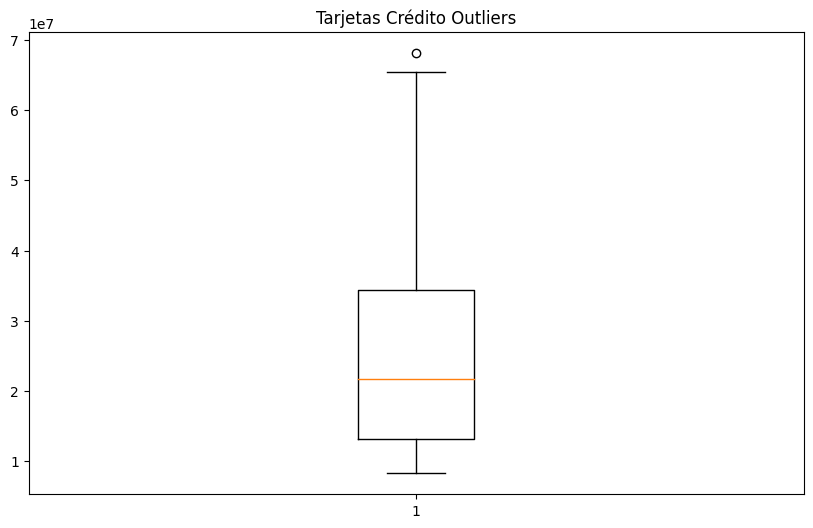

In [77]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["tarjetas_credito"]) 
plt.title("Tarjetas Crédito Outliers")
plt.show()

In [78]:
#Método: Desviación estándar
y=df["tarjetas_credito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 74177760.0031438
Limite inferior permitido -21391552.06289764


In [79]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [80]:
#Método: Cuartiles (0.25 y 0.75)
y=df["tarjetas_credito"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 66191782.864999995
Limite inferior permitido -18528673.494999994


In [81]:
#Outliers
outliersi= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersi

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [82]:
#Obtenemos datos limpios
data_cleani= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleani

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,01/12/2021,183983.2,31595.7,1.839832e+08,1.788667e+08,5.116431e+06,1.839832e+08,5.664003e+07,5.543219e+07,...,4.519991e+07,5.859939e+06,1.627522e+07,2.126505e+07,5.863701e+06,1.679029e+06,2.175394e+07,4.759533e+06,1.266927e+07,1.666512e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06


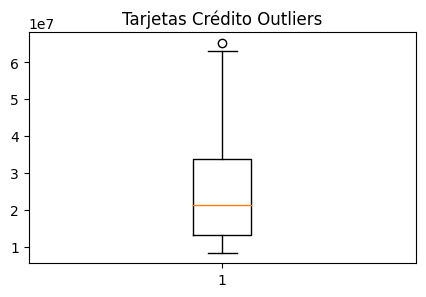

In [83]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleani["tarjetas_credito"]) 
plt.title("Tarjetas Crédito Outliers")
plt.show()

In [84]:
data_cleani.to_csv("tarejtas_credito.csv")
from google.colab import files
files.download("tarejtas_credito.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **otros_medios**

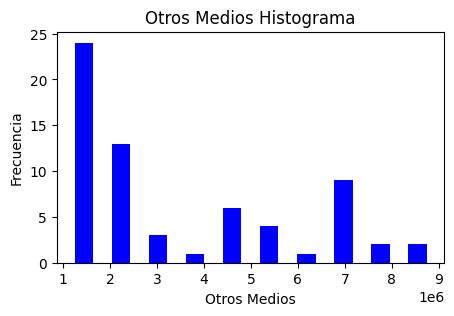

In [85]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["otros_medios"], color='blue', rwidth=0.50)
plt.title('Otros Medios Histograma')
plt.xlabel('Otros Medios')
plt.ylabel('Frecuencia')
plt.show() 

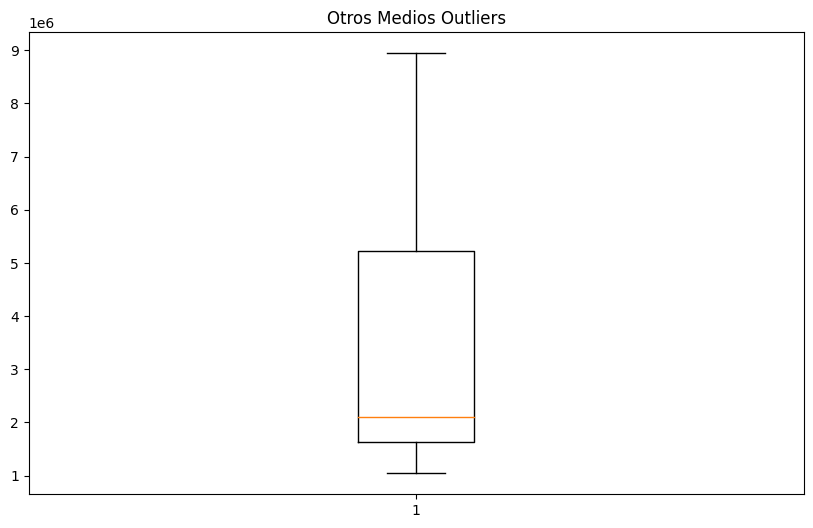

In [86]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["otros_medios"]) 
plt.title("Otros Medios Outliers")
plt.show() 

In [87]:
#Método: Desviación estándar
y=df["subtotal_ventas_alimentos_bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 143021333.08929762
Limite inferior permitido -32426087.265605308


In [88]:
# Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [89]:
#Método: Cuartiles (0.25 y 0.75)
y=df["otros_medios"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 10618426.665
Limite inferior permitido -3761808.2949999995


In [90]:
#Outliers
outliersj= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersj

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [91]:
#Datos limpios
data_cleanj= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanj

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


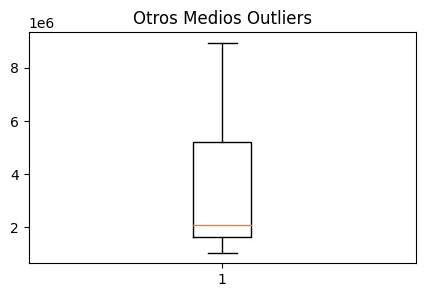

In [92]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanj["otros_medios"]) 
plt.title("Otros Medios Outliers")
plt.show() #dibujamos el diagrama

In [93]:
data_cleanj.to_csv("otros_medios.csv")
from google.colab import files
files.download("otros_medios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **sutotal_ventas_alimentos_bebidas**

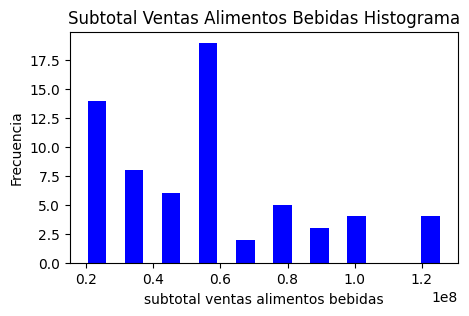

In [94]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["subtotal_ventas_alimentos_bebidas"], color='blue', rwidth=0.50)
plt.title("Subtotal Ventas Alimentos Bebidas Histograma")
plt.xlabel('subtotal ventas alimentos bebidas')
plt.ylabel('Frecuencia')
plt.show()

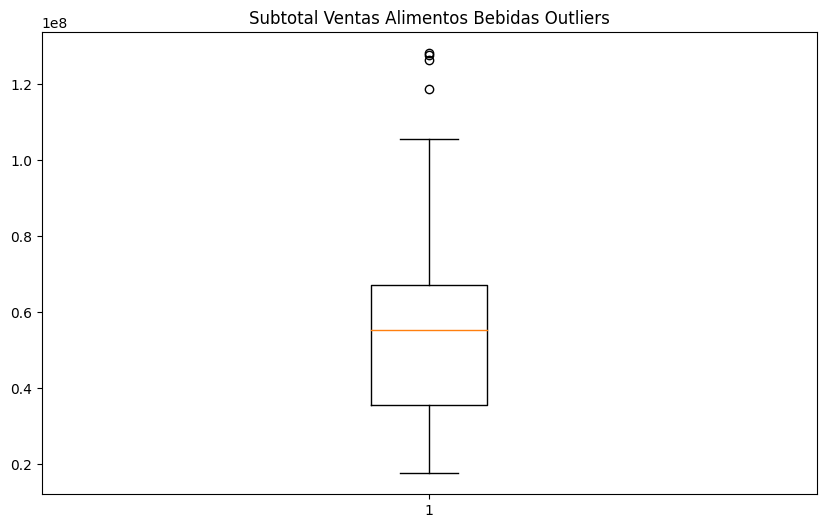

In [95]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["subtotal_ventas_alimentos_bebidas"]) 
plt.title("Subtotal Ventas Alimentos Bebidas Outliers")
plt.show()

In [96]:
#Método: Desviación Estándar
y=df["subtotal_ventas_alimentos_bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 143021333.08929762
Limite inferior permitido -32426087.265605308


In [97]:
#Outliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [98]:
#Método: Cuartiles (0.25 y 0.75)
y=df["subtotal_ventas_alimentos_bebidas"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 114548006.925
Limite inferior permitido -11790048.954999998


In [99]:
#Outliers
outliersk= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersk

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,4647828.60,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [100]:
#Datos limpios
data_cleank= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleank

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


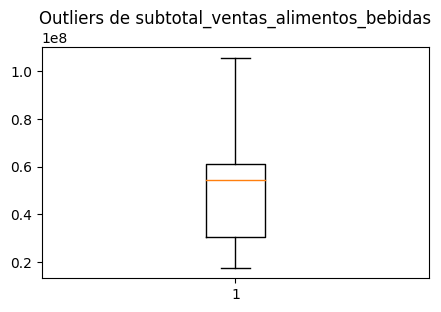

In [101]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleank["subtotal_ventas_alimentos_bebidas"]) 
plt.title("Outliers de subtotal_ventas_alimentos_bebidas")
plt.show() 

In [102]:
data_cleank.to_csv("subtotal_ventas_alimentos_bebidas.csv")
from google.colab import files
files.download("subtotal_ventas_alimentos_bebidas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **bebidas**

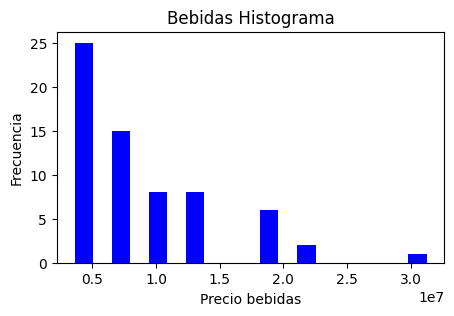

In [103]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["bebidas"], color='blue', rwidth=0.50)
plt.title('Bebidas Histograma')
plt.xlabel('Precio bebidas')
plt.ylabel('Frecuencia')
plt.show() 

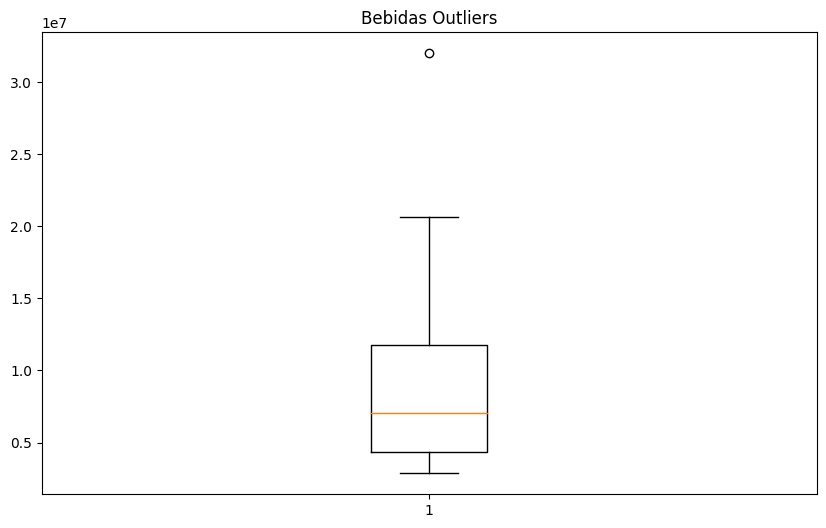

In [104]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["bebidas"]) 
plt.title("Bebidas Outliers")
plt.show()

In [105]:
#Método: Cuartiles (0.25 y 0.75)
y=df["bebidas"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 22825184.4515
Limite inferior permitido -6724636.7525


In [106]:
#Outliers
outliersl= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersl

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [107]:
#Datos limpios
data_cleanl= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanl

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


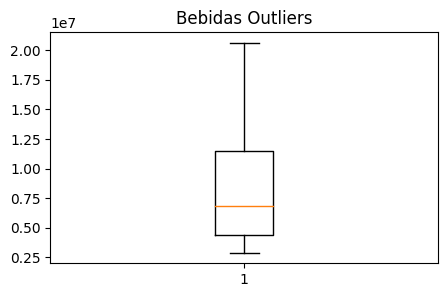

In [108]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanl["bebidas"]) 
plt.title("Bebidas Outliers")
plt.show()

In [109]:
data_cleanl.to_csv("bebidas.csv")
from google.colab import files
files.download("bebidas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **panaderia**

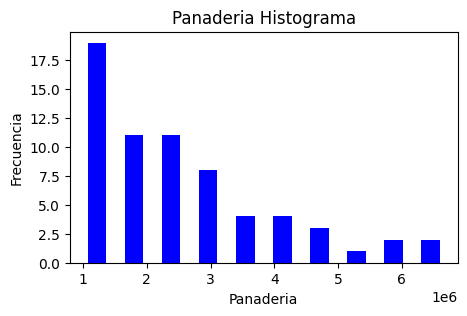

In [110]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["panaderia"], color='blue', rwidth=0.50)
plt.title('Panaderia Histograma')
plt.xlabel('Panaderia')
plt.ylabel('Frecuencia')
plt.show()

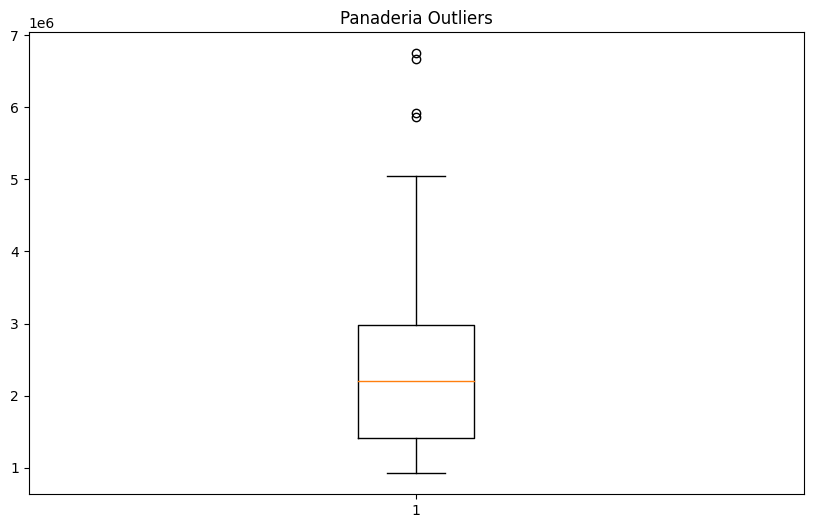

In [111]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["panaderia"]) 
plt.title("Panaderia Outliers")
plt.show() 

In [112]:
#Método: Cuartiles (0.25 y 0.75)
y=df["panaderia"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 5344003.4675
Limite inferior permitido -946571.9125000001


In [113]:
#Outliers
outliersm= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersm

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,4647828.60,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [114]:
#Datos limpios
data_cleanm= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanm

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


In [115]:
data_cleanm.to_csv("panaderia.csv")
from google.colab import files
files.download("panaderia.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **alimentos_preparados_rotiseria**

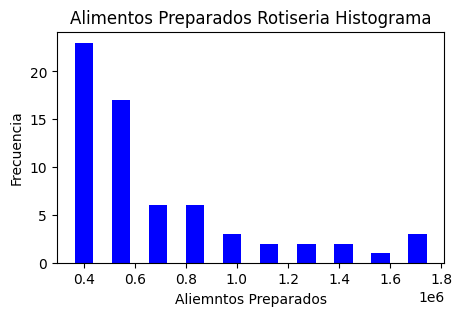

In [116]:
#Hisotgrama
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["alimentos_preparados_rotiseria"], color='blue', rwidth=0.50)
plt.title('Alimentos Preparados Rotiseria Histograma')
plt.xlabel('Aliemntos Preparados')
plt.ylabel('Frecuencia')
plt.show()

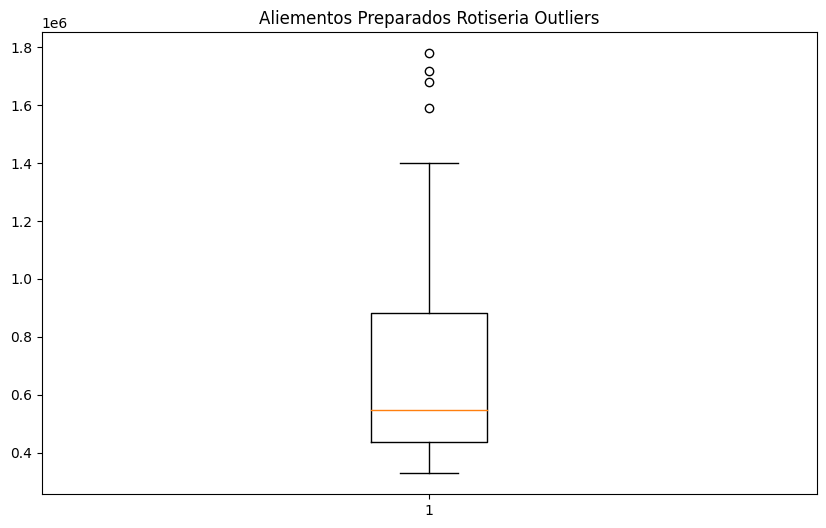

In [117]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["alimentos_preparados_rotiseria"]) 
plt.title("Aliementos Preparados Rotiseria Outliers")
plt.show() 

In [118]:
#Método: Cuartiles (0.25 y 0.75)
y=df["alimentos_preparados_rotiseria"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 1546751.13875
Limite inferior permitido -227313.79444999993


In [119]:
#Outliers
outliersn= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersn

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,5776003.50
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,4647828.60,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [120]:
#Datos limpios
data_cleano= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleano

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4416780.259,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4486843.920,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5751181.809,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07


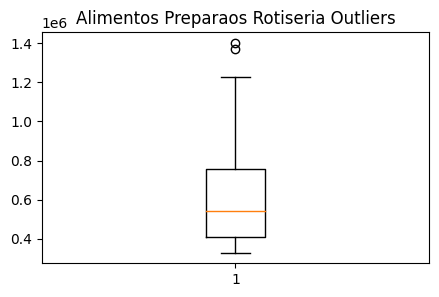

In [121]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleano["alimentos_preparados_rotiseria"]) 
plt.title("Alimentos Preparaos Rotiseria Outliers")
plt.show() 

In [122]:
data_cleano.to_csv("alimentos_preparados_rotiseria.csv")
from google.colab import files
files.download("alimentos_preparados_rotiseria.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **indumentaria_calzado_textiles_hogar**

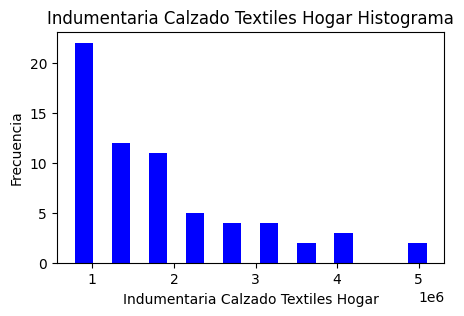

In [123]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["indumentaria_calzado_textiles_hogar"], color='blue', rwidth=0.50)
plt.title('Indumentaria Calzado Textiles Hogar Histograma')
plt.xlabel('Indumentaria Calzado Textiles Hogar')
plt.ylabel('Frecuencia')
plt.show()

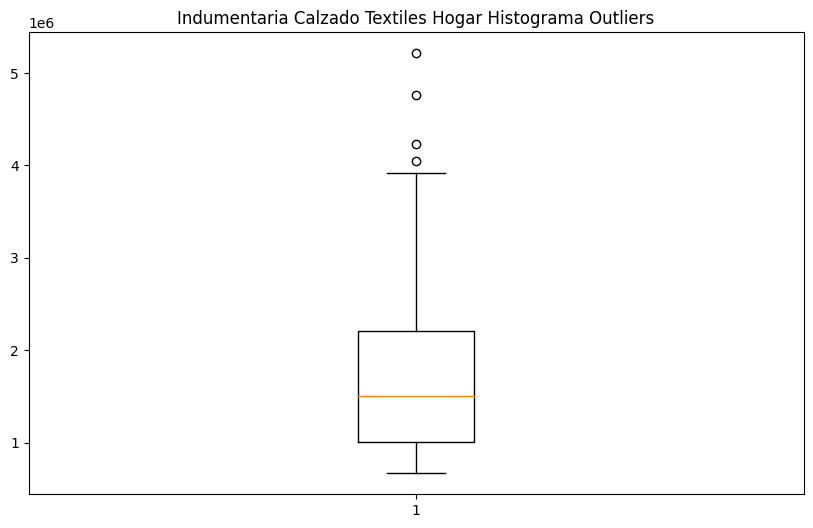

In [124]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["indumentaria_calzado_textiles_hogar"]) 
plt.title("Indumentaria Calzado Textiles Hogar Histograma Outliers")
plt.show() 

In [125]:
#Método: Cuartiles (0.25 y 0.75)
y=df["indumentaria_calzado_textiles_hogar"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 4001205.6905000005
Limite inferior permitido -784042.9135000001


In [126]:
#Outliers
outliersp= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersp

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
54,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4754454.215,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1052052.786,15724007.71,4051857.507,9222787.62,9.421771e+06
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,4647828.60,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,1.234998e+07


In [127]:
#Datos limpios
data_cleanp= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanp

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07


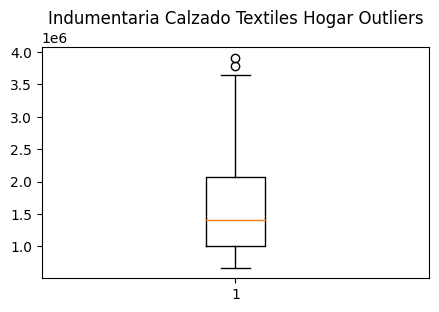

In [128]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanp["indumentaria_calzado_textiles_hogar"]) 
plt.title("Indumentaria Calzado Textiles Hogar Outliers")
plt.show()

In [129]:
data_cleanp.to_csv("indumentaria_calzado_textiles_hogar.csv")
from google.colab import files
files.download("indumentaria_calzado_textiles_hogar.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **electronicos_articulos_hogar**

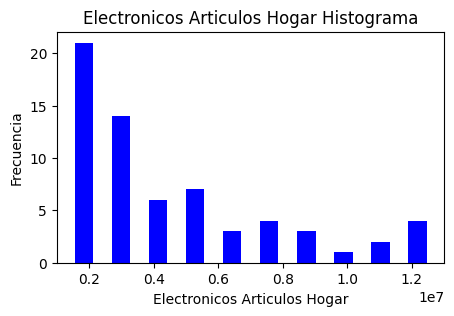

In [130]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["electronicos_articulos_hogar"], color='blue', rwidth=0.50)
plt.title('Electronicos Articulos Hogar Histograma')
plt.xlabel('Electronicos Articulos Hogar')
plt.ylabel('Frecuencia')
plt.show() 

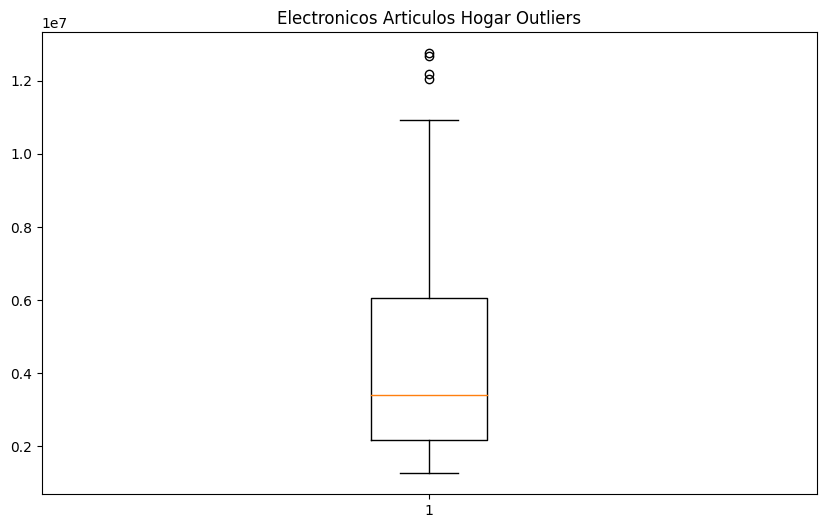

In [131]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["electronicos_articulos_hogar"]) 
plt.title("Electronicos Articulos Hogar Outliers")
plt.show()

In [132]:
#Método: Cuartiles (0.25 y 0.75)
y=df["electronicos_articulos_hogar"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 11851594.895499999
Limite inferior permitido -3640353.060499999


In [133]:
#Outliers
outliersq= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersq

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
58,58,01/11/2021,141702.0,25026.6,141701960.7,135950778.8,5751181.809,141701960.7,43762928.15,39925207.45,...,36354580.02,4509964.850,14720418.14,15761449.15,4869397.981,1213625.230,18664160.82,3209173.083,12754368.89,11464394.10
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,12187552.35,13433071.98
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [134]:
#Datos limpios
data_cleanq= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanq

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,01/09/2021,123002.3,22962.0,1.230023e+08,1.185855e+08,4.416780e+06,1.230023e+08,3.808075e+07,3.457538e+07,...,3.429884e+07,4.333687e+06,1.448989e+07,1.472198e+07,4.184266e+06,1.103824e+06,1.633676e+07,2.805934e+06,7.977185e+06,8.585647e+06
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06


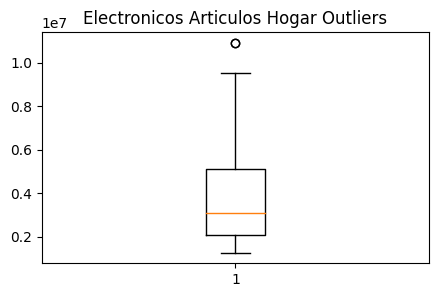

In [135]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanq["electronicos_articulos_hogar"]) 
plt.title("Electronicos Articulos Hogar Outliers")
plt.show() #dibujamos el diagrama

In [136]:
data_cleanq.to_csv("electronicos_articulos_hogar.csv")
from google.colab import files
files.download("electronicos_articulos_hogar.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **otros**

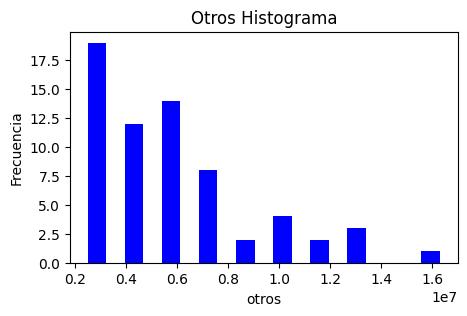

In [137]:
#Histograma
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["otros"], color='blue', rwidth=0.50)
plt.title('Otros Histograma')
plt.xlabel('otros')
plt.ylabel('Frecuencia')
plt.show() 

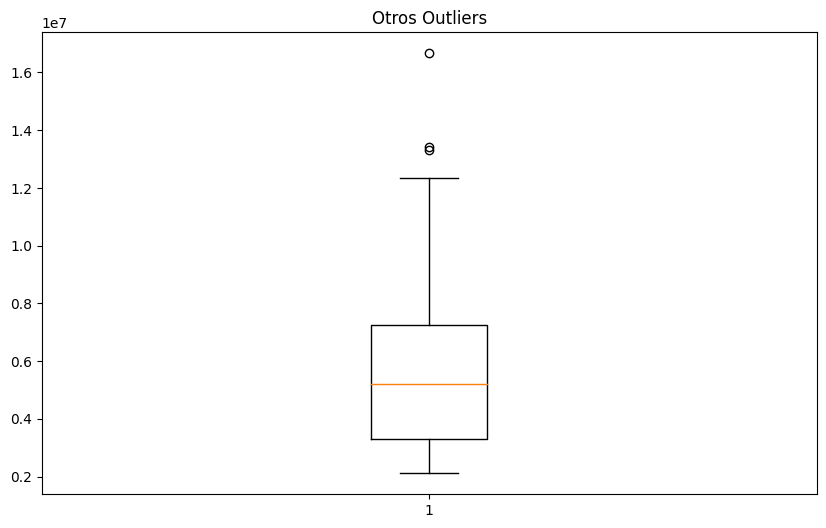

In [138]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["otros"]) 
plt.title("Otros Outliers")
plt.show()

In [139]:
#Método: Cuartiles (0.25 y 0.75)
y=df["otros"]
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 13169100.024999999
Limite inferior permitido -2599893.999


In [140]:
#Outliers
outliersr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3796044.076,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,1832572.100,9.189746e+06,13301387.17


In [141]:
#Datos limpios
data_cleanr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_cleanr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,01/10/2021,140487.5,25386.7,1.404875e+08,1.360006e+08,4.486844e+06,1.404875e+08,4.332335e+07,3.969751e+07,...,3.708160e+07,4.773476e+06,1.556103e+07,1.634940e+07,4.785226e+06,1.226504e+06,1.850172e+07,3.328328e+06,1.091989e+07,1.012184e+07
58,58,01/11/2021,141702.0,25026.6,1.417020e+08,1.359508e+08,5.751182e+06,1.417020e+08,4.376293e+07,3.992521e+07,...,3.635458e+07,4.509965e+06,1.472042e+07,1.576145e+07,4.869398e+06,1.213625e+06,1.866416e+07,3.209173e+06,1.275437e+07,1.146439e+07
62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,4.647829e+06,1.191048e+07


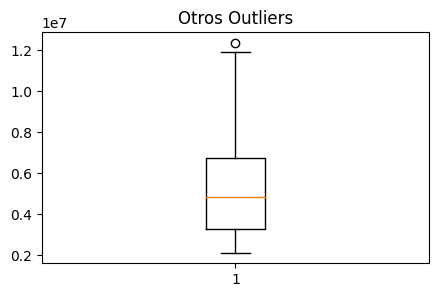

In [142]:
#Diagrama de caja / bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_cleanr["otros"]) 
plt.title("Otros Outliers")
plt.show()

In [143]:
data_cleanr.to_csv("otros.csv")
from google.colab import files
files.download("otros.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>